# Capstone Project: Let's make it a hit song!
#### By Marco Antonio Godoy

In [34]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Overview
For more than 20 years, I've been actively and passively involved in the highly competitive music industry, in roles related to music production, engineering, composition, songwriting, performance and consulting. I've had the opportunity to work with many artists from different nationalities, styles and backgrounds, in a wide array of projects, from collaborations (aka "no money") to fully funded productions backed by major record labels. Over the years, I've witnessed how some of these artists have achieved international recognition, while others have not been able to grow their local niche audiences. Surprisingly, the financial support that major labels provide to their artists doesn't always translate into successful acts. In fact, by leveraging the power of social media, some independent artists have been able to grow bigger audiences than some of their counterparts, even with much smaller marketing budgets. Moreover, I've noticed how fans seem to favor the charisma and big persona of some artists over the exceptional talent of others. However, one crucial differentiator between those who "make it" in the music business and those who don't is that behind every successful artist there's always a "hit" (top played) song. Therefore, I find in this capstone project the perfect opportunity to leverage AI/ML techniques with the goal of identifying the qualities and attributes that make a song a "hit".

# Business Understanding
Record labels spend fortunes in the development of artists, but they struggle to find songs that have potential to become hits. This might be the reason why some artists have resorted into recording cover songs (songs that have been recorded previously by other artists).

Therefore, designing a model that can predict with a high precision if a song has the potential to become a hit can translate into significant cost reductions for both the artists and the record labels since it would help reduce the "guess" work when choosing which songs to record and promote.

# Data Exploration

This analysis is primarily based on a dataset titled Spotify Dataset 2023 by Tony Gordon available at Kaggle. The author did an exceptional job fetching the data from the Spotify API and organizing it into five subdatasets containing "albums", "artists data", "Spotify data", "features data" and "tracks data". The total columns for the entire dataset is 108, and the largest dataset ("tracks data") contains a total of 438938 entries, and a feature named "track_popularity" which will be a crucial feature in this analysis. Although this dataset seems to contain all the data needed to work on this analysis, additional data can be obtained from the Spotify API

In [14]:
# Load Spotify consolidated data 
df = pd.read_csv('data/spotify_data_12_20_2023.csv', low_memory=False)

In [15]:
# Get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375141 entries, 0 to 375140
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   album_id           375141 non-null  object 
 1   album_name         375141 non-null  object 
 2   album_popularity   375141 non-null  int64  
 3   album_type         375141 non-null  object 
 4   artists            375141 non-null  object 
 5   artist_0           375139 non-null  object 
 6   artist_1           87079 non-null   object 
 7   artist_2           38300 non-null   object 
 8   artist_3           13823 non-null   object 
 9   artist_4           6087 non-null    object 
 10  artist_id          375141 non-null  object 
 11  duration_sec       375141 non-null  float64
 12  label              375117 non-null  object 
 13  release_date       375119 non-null  object 
 14  total_tracks       375141 non-null  int64  
 15  track_id           375141 non-null  object 
 16  tr

In [16]:
# Display the first five entries
df.head(5)

,album_id,album_name,album_popularity,album_type,artists,artist_0,artist_1,artist_2,artist_3,artist_4,...,time_signature,track_href,type,uri,valence,explicit,track_popularity,release_year,release_month,rn
0,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/5JucnTkqh8uC...,audio_features,spotify:track:5JucnTkqh8uCZGggL1xxvv,0.382,True,0.0,2023.0,April,1
1,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', '22nd Jim']",AB,22nd Jim,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/4VWrKNG3ssyZ...,audio_features,spotify:track:4VWrKNG3ssyZeboTgQ7Kj1,0.193,True,1.0,2023.0,April,1
2,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', 'Veeze']",AB,Veeze,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/6JsVrTLJPSOS...,audio_features,spotify:track:6JsVrTLJPSOSpgJSnZyfSK,0.835,True,1.0,2023.0,April,1
3,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/7pZpw1xJWIav...,audio_features,spotify:track:7pZpw1xJWIavCUGqXPPriP,0.252,True,0.0,2023.0,April,1
4,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,NaN,NaN,NaN,NaN,...,4.0,https://api.spotify.com/v1/tracks/0ylqwc3gcJdJ...,audio_features,spotify:track:0ylqwc3gcJdJotKd4SfMiu,0.380,True,0.0,2023.0,April,1


# Data Preparation

We can observe that most of the columns contain complete information. However, there are some secondary columns such as "artist_1", "artist_2", "artist_3","artist_4", "genre_1", "genre_2", "genre_3", "genre_4" that contain incomplete information. We're going to remove these.  

In [17]:
# Drop artist and secondary genre columns
df_clean = df.drop(['artist_1', 'artist_2', 'artist_3', 'artist_4', 'genre_1', 'genre_2', 'genre_3', 'genre_4'], axis=1)

In [18]:
# Verify drop 
df_clean

,album_id,album_name,album_popularity,album_type,artists,artist_0,artist_id,duration_sec,label,release_date,...,time_signature,track_href,type,uri,valence,explicit,track_popularity,release_year,release_month,rn
0,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,08jcfs5JspUBqM3rbFNUzm,92.063,About Benjamin Records,2023-04-15 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/5JucnTkqh8uC...,audio_features,spotify:track:5JucnTkqh8uCZGggL1xxvv,0.3820,True,0.0,2023.0,April,1
1,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', '22nd Jim']",AB,08jcfs5JspUBqM3rbFNUzm,125.320,About Benjamin Records,2023-04-15 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/4VWrKNG3ssyZ...,audio_features,spotify:track:4VWrKNG3ssyZeboTgQ7Kj1,0.1930,True,1.0,2023.0,April,1
2,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,"['AB', 'Veeze']",AB,08jcfs5JspUBqM3rbFNUzm,139.800,About Benjamin Records,2023-04-15 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/6JsVrTLJPSOS...,audio_features,spotify:track:6JsVrTLJPSOSpgJSnZyfSK,0.8350,True,1.0,2023.0,April,1
3,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,08jcfs5JspUBqM3rbFNUzm,147.777,About Benjamin Records,2023-04-15 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/7pZpw1xJWIav...,audio_features,spotify:track:7pZpw1xJWIavCUGqXPPriP,0.2520,True,0.0,2023.0,April,1
4,4zH8bbEjLe0Gdbv2FVLjnK,Son Of Tabu,1,album,['AB'],AB,08jcfs5JspUBqM3rbFNUzm,102.600,About Benjamin Records,2023-04-15 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/0ylqwc3gcJdJ...,audio_features,spotify:track:0ylqwc3gcJdJotKd4SfMiu,0.3800,True,0.0,2023.0,April,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375136,1MPAXuTVL2Ej5x0JHiSPq8,Reputation Stadium Tour Surprise Song Playlist,76,album,['Taylor Swift'],Taylor Swift,06HL4z0CvFAxyc27GXpf02,267.653,"Big Machine Records, LLC",2017-11-09 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/2fF3QzbGCrtr...,audio_features,spotify:track:2fF3QzbGCrtrDXIdWcg1mv,0.6500,False,35.0,2017.0,November,1
375137,6fyR4wBPwLHKcRtxgd4sGh,Speak Now World Tour Live,60,album,['Taylor Swift'],Taylor Swift,06HL4z0CvFAxyc27GXpf02,315.173,"Big Machine Records, LLC",2010-10-25 00:00:00 UTC,...,5.0,https://api.spotify.com/v1/tracks/0BSmbCIY36iw...,audio_features,spotify:track:0BSmbCIY36iw04azzJ3S0S,0.2700,False,53.0,2010.0,October,1
375138,7mzrIsaAjnXihW3InKjlC3,Taylor Swift,75,album,['Taylor Swift'],Taylor Swift,06HL4z0CvFAxyc27GXpf02,207.106,"Big Machine Records, LLC",2006-10-24 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/2QA3IixpRcKy...,audio_features,spotify:track:2QA3IixpRcKyOdG7XDzRgv,0.5910,False,58.0,2006.0,October,1
375139,11gfxXxJPd3j6sdWUyEA5S,Taylor Swift Karaoke: Red,20,album,"['Taylor Swift', 'Ed Sheeran']",Taylor Swift,06HL4z0CvFAxyc27GXpf02,243.933,"Big Machine Records, LLC",2012-10-22 00:00:00 UTC,...,4.0,https://api.spotify.com/v1/tracks/5cXTESo2BLCY...,audio_features,spotify:track:5cXTESo2BLCYwmUKF2uE8A,0.2690,False,7.0,2012.0,October,1


Additionally, since the focus of the analysis is on the attributes of the song and not on the album, we will drop the album related columns. 

In [19]:
# Drop album related columns
df_clean = df_clean.drop([
    'album_id', 
    'album_name', 
    'album_popularity', 
    'album_type', 
    'total_tracks', 
    'track_id', 
    'track_number'
], axis=1)

There also seems to be redundant information across the columns related to artists. We'll explore this:

In [20]:
# Explore arist related columns
df_clean[['artists','artist_0', 'name', 'artist_id']]

,artists,artist_0,name,artist_id
0,['AB'],AB,AB,08jcfs5JspUBqM3rbFNUzm
1,"['AB', '22nd Jim']",AB,AB,08jcfs5JspUBqM3rbFNUzm
2,"['AB', 'Veeze']",AB,AB,08jcfs5JspUBqM3rbFNUzm
3,['AB'],AB,AB,08jcfs5JspUBqM3rbFNUzm
4,['AB'],AB,AB,08jcfs5JspUBqM3rbFNUzm
...,...,...,...,...
375136,['Taylor Swift'],Taylor Swift,Taylor Swift,06HL4z0CvFAxyc27GXpf02
375137,['Taylor Swift'],Taylor Swift,Taylor Swift,06HL4z0CvFAxyc27GXpf02
375138,['Taylor Swift'],Taylor Swift,Taylor Swift,06HL4z0CvFAxyc27GXpf02
375139,"['Taylor Swift', 'Ed Sheeran']",Taylor Swift,Taylor Swift,06HL4z0CvFAxyc27GXpf02


As it can be observed, the "artists" column contains an array of artists that are featured of the track; the "artist_0" column holds the name of the primary artist, and the column "name" seems to also hold the name of the artist. 

Since the focus is on the characteristics of the track and not of the name of the artist, we will also drop these artist related columns, except for the artist popularity since we expect this to be an important factor.


In [21]:
# Drop artist related columns
df_clean = df_clean.drop(['artists','artist_0', 'artist_genres', 'name', 'artist_id', 'artist_genres', 'artist_popularity', 'followers'], axis=1)

In [22]:
# Verify drop
df_clean

,duration_sec,label,release_date,track_name,genre_0,acousticness,analysis_url,danceability,duration_ms,energy,...,time_signature,track_href,type,uri,valence,explicit,track_popularity,release_year,release_month,rn
0,92.063,About Benjamin Records,2023-04-15 00:00:00 UTC,Intro,NaN,0.03050,https://api.spotify.com/v1/audio-analysis/5Juc...,0.622,92064.0,0.554,...,4.0,https://api.spotify.com/v1/tracks/5JucnTkqh8uC...,audio_features,spotify:track:5JucnTkqh8uCZGggL1xxvv,0.3820,True,0.0,2023.0,April,1
1,125.320,About Benjamin Records,2023-04-15 00:00:00 UTC,Play It Cool,NaN,0.01120,https://api.spotify.com/v1/audio-analysis/4VWr...,0.899,125320.0,0.701,...,4.0,https://api.spotify.com/v1/tracks/4VWrKNG3ssyZ...,audio_features,spotify:track:4VWrKNG3ssyZeboTgQ7Kj1,0.1930,True,1.0,2023.0,April,1
2,139.800,About Benjamin Records,2023-04-15 00:00:00 UTC,3 Peat,NaN,0.08150,https://api.spotify.com/v1/audio-analysis/6JsV...,0.782,139800.0,0.716,...,4.0,https://api.spotify.com/v1/tracks/6JsVrTLJPSOS...,audio_features,spotify:track:6JsVrTLJPSOSpgJSnZyfSK,0.8350,True,1.0,2023.0,April,1
3,147.777,About Benjamin Records,2023-04-15 00:00:00 UTC,Affiliated,NaN,0.00413,https://api.spotify.com/v1/audio-analysis/7pZp...,0.944,147778.0,0.582,...,4.0,https://api.spotify.com/v1/tracks/7pZpw1xJWIav...,audio_features,spotify:track:7pZpw1xJWIavCUGqXPPriP,0.2520,True,0.0,2023.0,April,1
4,102.600,About Benjamin Records,2023-04-15 00:00:00 UTC,Springfield,NaN,0.01290,https://api.spotify.com/v1/audio-analysis/0ylq...,0.527,102600.0,0.641,...,4.0,https://api.spotify.com/v1/tracks/0ylqwc3gcJdJ...,audio_features,spotify:track:0ylqwc3gcJdJotKd4SfMiu,0.3800,True,0.0,2023.0,April,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375136,267.653,"Big Machine Records, LLC",2017-11-09 00:00:00 UTC,The Story Of Us,pop,0.00556,https://api.spotify.com/v1/audio-analysis/2fF3...,0.547,267653.0,0.808,...,4.0,https://api.spotify.com/v1/tracks/2fF3QzbGCrtr...,audio_features,spotify:track:2fF3QzbGCrtrDXIdWcg1mv,0.6500,False,35.0,2017.0,November,1
375137,315.173,"Big Machine Records, LLC",2010-10-25 00:00:00 UTC,Drops Of Jupiter - Live/2011,pop,0.80600,https://api.spotify.com/v1/audio-analysis/0BSm...,0.374,315173.0,0.504,...,5.0,https://api.spotify.com/v1/tracks/0BSmbCIY36iw...,audio_features,spotify:track:0BSmbCIY36iw04azzJ3S0S,0.2700,False,53.0,2010.0,October,1
375138,207.106,"Big Machine Records, LLC",2006-10-24 00:00:00 UTC,The Outside,pop,0.00491,https://api.spotify.com/v1/audio-analysis/2QA3...,0.589,207107.0,0.805,...,4.0,https://api.spotify.com/v1/tracks/2QA3IixpRcKy...,audio_features,spotify:track:2QA3IixpRcKyOdG7XDzRgv,0.5910,False,58.0,2006.0,October,1
375139,243.933,"Big Machine Records, LLC",2012-10-22 00:00:00 UTC,Everything Has Changed - Instrumental With Bac...,pop,0.12400,https://api.spotify.com/v1/audio-analysis/5cXT...,0.581,243933.0,0.469,...,4.0,https://api.spotify.com/v1/tracks/5cXTESo2BLCY...,audio_features,spotify:track:5cXTESo2BLCYwmUKF2uE8A,0.2690,False,7.0,2012.0,October,1


The "release_date" column contains the exact date when the album was released. However, this information is also available on the release_year and release_month columns. In fact, since a new track cannot be released in the past, we'll also going to ignore the relase year and only preserve the release month. We don't expect the exact release day to be as relevant. Therefore, we will also drop the "release_date" and "release_year" columns:   

In [23]:
# Drop unnecessary release date information
df_clean = df_clean.drop(['release_date', 'release_year'], axis=1)

The "label" column holds the name of the label that released the track. We want to explore how many different values this column holds to manke a determination if it should be dropped.


In [24]:
# Get value counts for label column
df_clean['label'].value_counts()

Sami Springs              3395
CC Entertainment          3197
Columbia                  2316
Legacy Recordings         2058
Ameritz Music Ltd         2040
                          ... 
FUJI JR                      1
ARTIST DISTRIBUTION          1
WEST JAVA MUSIC RECORD       1
Rod Truss                    1
2078922 Records DK2          1
Name: label, Length: 29639, dtype: int64

Although it is reasonable to thing that the marketing budget of major labels might be a significant factor in making a track a hit, the fact that there are a total of 29639 different record labels (major and independent) might make the computation of our analysis less efficient. Therefore, we will drop this column for now.


In [25]:
# Drop label column
df_clean = df_clean.drop('label', axis=1)

There are other columns that hold information such as the "analysis_url", "track_href", "uri", "type" and "rn". These seem to be specific addresses to additional metadata available from Spotify. We don't consider these to be a major factor in the outcome of our analysis. Therefore, we will drop these as well.

In [26]:
# Drop unnecessary metadata
df_clean = df_clean.drop(['analysis_url', 'uri', 'track_href', 'type', 'rn'], axis=1)

Although it is reasonable to believe that the name of a song might have an influence in its popularity, we don't expect this to be a major factor. Therefore, we will drop this column at this stage as well.


In [27]:
# Drop track name
df_clean = df_clean.drop('track_name', axis=1)

Also, we can observe that there are two columns that with the track duration: one in seconds and the other onw in milliseconds. We're going to remove the column that contains the data in milliseconds.


In [28]:
# Remove redundant duration column 
df_clean = df_clean.drop('duration_ms', axis=1)

In [29]:
# Verify drops
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375141 entries, 0 to 375140
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_sec      375141 non-null  float64
 1   genre_0           209863 non-null  object 
 2   acousticness      374364 non-null  float64
 3   danceability      374364 non-null  float64
 4   energy            374364 non-null  float64
 5   instrumentalness  374364 non-null  float64
 6   key               374364 non-null  float64
 7   liveness          374364 non-null  float64
 8   loudness          374364 non-null  float64
 9   mode              374364 non-null  float64
 10  speechiness       374364 non-null  float64
 11  tempo             374364 non-null  float64
 12  time_signature    374364 non-null  float64
 13  valence           374364 non-null  float64
 14  explicit          375131 non-null  object 
 15  track_popularity  375131 non-null  float64
 16  release_month     37

After having dropped the columns we don't consider necessary, we can observe that there's some missing information in the columns we selected. We're going to drop the entries with missing information.  

In [30]:
# Drop entries with missing values
df_clean = df_clean.dropna()

The resulting "clean" dataframe is provided below:

In [31]:
# Verify drop
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209364 entries, 334 to 375140
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration_sec      209364 non-null  float64
 1   genre_0           209364 non-null  object 
 2   acousticness      209364 non-null  float64
 3   danceability      209364 non-null  float64
 4   energy            209364 non-null  float64
 5   instrumentalness  209364 non-null  float64
 6   key               209364 non-null  float64
 7   liveness          209364 non-null  float64
 8   loudness          209364 non-null  float64
 9   mode              209364 non-null  float64
 10  speechiness       209364 non-null  float64
 11  tempo             209364 non-null  float64
 12  time_signature    209364 non-null  float64
 13  valence           209364 non-null  float64
 14  explicit          209364 non-null  object 
 15  track_popularity  209364 non-null  float64
 16  release_month     

In [ ]:
data_loss = len(df_clean)/len(df)
print(data_loss)

<b>Important: Notice that the total number of entries on the clean dataset is 209364. This represents a data loss of ~46%</b>

In [32]:
# Get stats summary on the resulting datase
df_clean.describe()

,duration_sec,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity
count,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000,209364.000000
mean,223.080094,0.390705,0.559192,0.534689,0.247641,5.256830,0.205003,-10.997748,0.650078,0.101287,118.340800,3.869476,0.456605,15.502847
std,115.984649,0.367553,0.193325,0.273731,0.368983,3.572019,0.186455,6.744645,0.476946,0.134646,30.591081,0.521341,0.269739,18.095373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,168.693000,0.035100,0.434000,0.315000,0.000000,2.000000,0.097000,-13.879250,0.000000,0.036000,94.981000,4.000000,0.228000,1.000000
50%,211.588000,0.262000,0.583000,0.559000,0.000626,5.000000,0.126000,-9.035000,1.000000,0.048200,118.743500,4.000000,0.444000,8.000000
75%,258.059000,0.767000,0.703000,0.762000,0.605000,8.000000,0.250000,-6.240000,1.000000,0.093000,137.346000,4.000000,0.673000,25.000000
max,5280.026000,0.996000,0.988000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,0.968000,247.981000,5.000000,1.000000,99.000000


<Axes: >

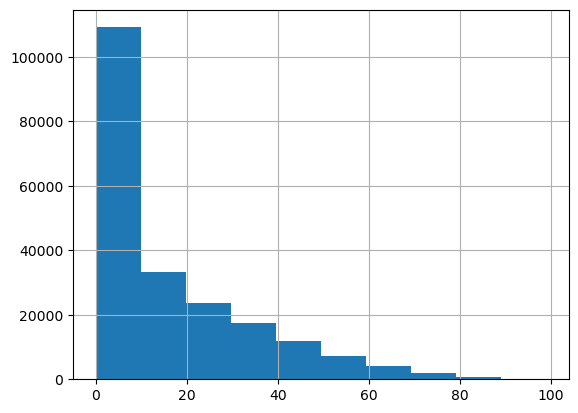

In [33]:
# Visualize track popularity
df_clean['track_popularity'].hist()

A very important observation we should make at this point is that the mean of the "track_popularity" on the clean dataframe is 15.5, while the highest "track_popularity" value is 99, and the std is ~18

Next, we should explore what's the correlation of the track popularity with the other numerical features.

<Axes: >

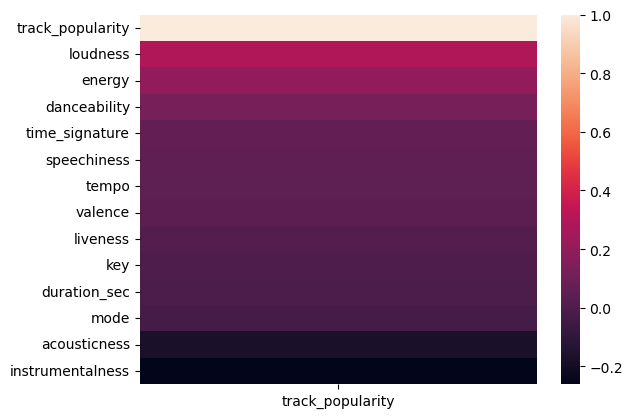

In [36]:
# Get heatmap of data correlations
sns.heatmap(df_clean.corr(numeric_only=True)[['track_popularity']].sort_values(by='track_popularity', ascending=False))

### Determining The Popularity Threshold

We need to make a determination on what is considered a hit track. According to the website [House of Tracks] (https://houseoftracks.com/faq/what-qualifies-a-song-as-a-hit), there are many factors that can contribute to whether or not a song becomes popular. They claim that in the United States and the United Kingdom, a single is usually considered a hit when it reaches the top 40 of the Billboard Hot 100 or the top 75 of the UK Singles Chart and stays there for at least one week. Moreover, the Guinness Book of British Hit Singles has used this definition since the 1970s.

(Draft - To limit the scope of the problem, we're going to use the top 40 songs of the Billboard Hot 100 chart as our baseline. However, we'll start by filtering the dataset to the 100 most popular songs on Spotify.)

We're going to start with the top 100 most popular songs in Spotify. Later we'll look into cross validating our results with the data from Billboard.   

In [38]:
# Get top 100 tracks sorted by popularity in descending order. 
spotify_top100= df_clean.sort_values(by='track_popularity', ascending=False).head(100)

In [39]:
# Explore dataframe
spotify_top100

,duration_sec,genre_0,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,explicit,track_popularity,release_month
364635,241.106,dance pop,0.1640,0.336,0.627,0.000000,7.0,0.0708,-7.463,1.0,0.0384,150.273,4.0,0.350,False,99.0,October
374458,178.426,pop,0.1170,0.552,0.702,0.000021,9.0,0.1050,-5.707,1.0,0.1570,169.994,4.0,0.564,False,99.0,August
361959,137.773,brooklyn indie,0.8680,0.504,0.308,0.135000,9.0,0.1580,-14.958,1.0,0.0321,113.950,4.0,0.121,False,98.0,September
374139,162.767,reggaeton,0.0887,0.911,0.778,0.000022,5.0,0.1790,-2.248,1.0,0.2620,96.057,4.0,0.345,True,97.0,October
374103,267.194,reggaeton,0.1500,0.787,0.621,0.000402,4.0,0.5800,-5.009,0.0,0.0680,139.056,4.0,0.130,True,96.0,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353497,194.543,pop,0.7360,0.768,0.644,0.000837,5.0,0.1730,-6.671,0.0,0.1360,95.050,4.0,0.530,False,87.0,March
370051,157.560,dfw rap,0.5330,0.755,0.522,0.000000,2.0,0.0685,-4.368,1.0,0.0575,89.960,4.0,0.925,False,87.0,September
369575,109.750,hip pop,0.5190,0.770,0.580,0.000127,0.0,0.2330,-8.393,1.0,0.2470,144.072,4.0,0.753,True,87.0,June
354123,68.760,adult standards,0.7420,0.684,0.437,0.000016,9.0,0.2240,-10.522,1.0,0.0491,107.607,4.0,0.964,False,87.0,January


In [40]:
# Get summary stats on top 100 tracks
spotify_top100.describe()

,duration_sec,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity
count,100.00000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,222.45049,0.240551,0.629950,0.611191,3.956585e-03,5.310000,0.191412,-6.748190,0.600000,0.093039,116.416440,3.960000,0.431830,89.610000
std,71.06563,0.272343,0.151306,0.176353,1.978225e-02,3.697378,0.145874,3.044413,0.492366,0.096394,29.404494,0.196946,0.253389,2.817317
min,68.76000,0.000307,0.319000,0.091100,0.000000e+00,0.000000,0.023200,-17.665000,0.000000,0.025400,75.956000,3.000000,0.049900,87.000000
25%,185.57750,0.051225,0.521750,0.516500,0.000000e+00,1.750000,0.099075,-7.886250,0.000000,0.035425,93.031250,4.000000,0.212000,87.750000
50%,216.64500,0.120500,0.630000,0.640500,5.250000e-07,5.500000,0.133500,-5.955000,1.000000,0.051600,112.620500,4.000000,0.396500,89.000000
75%,242.54975,0.339000,0.747500,0.725000,3.720000e-05,8.250000,0.234000,-4.759000,1.000000,0.084900,136.175750,4.000000,0.634250,91.000000
max,613.02600,0.959000,0.949000,0.965000,1.350000e-01,11.000000,0.765000,-2.248000,1.000000,0.478000,191.385000,4.000000,0.969000,99.000000


As it can be observed in the dataframe the minimum value for the track popularity is 87. It seems reasonable that we should expand our query to include all songs that have at least a popularity of 87 

In [41]:
# Create subset with tracks of popularity equal or greater than 87
spotify_popularity_gt_87 = df_clean.query('track_popularity >= 87').sort_values(by='track_popularity', ascending=False)

In [42]:
# Explore new dataframe
spotify_popularity_gt_87

,duration_sec,genre_0,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,explicit,track_popularity,release_month
364635,241.106,dance pop,0.16400,0.336,0.627,0.000000,7.0,0.0708,-7.463,1.0,0.0384,150.273,4.0,0.350,False,99.0,October
374458,178.426,pop,0.11700,0.552,0.702,0.000021,9.0,0.1050,-5.707,1.0,0.1570,169.994,4.0,0.564,False,99.0,August
361959,137.773,brooklyn indie,0.86800,0.504,0.308,0.135000,9.0,0.1580,-14.958,1.0,0.0321,113.950,4.0,0.121,False,98.0,September
374139,162.767,reggaeton,0.08870,0.911,0.778,0.000022,5.0,0.1790,-2.248,1.0,0.2620,96.057,4.0,0.345,True,97.0,October
374103,267.194,reggaeton,0.15000,0.787,0.621,0.000402,4.0,0.5800,-5.009,0.0,0.0680,139.056,4.0,0.130,True,96.0,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371209,224.000,barbadian pop,0.07170,0.509,0.637,0.000011,4.0,0.0789,-4.830,0.0,0.0471,172.006,3.0,0.378,True,87.0,January
371873,297.786,detroit hip hop,0.06220,0.548,0.847,0.000000,1.0,0.0816,-3.237,1.0,0.1860,171.447,4.0,0.100,True,87.0,May
371942,350.320,detroit hip hop,0.02150,0.802,0.755,0.000000,4.0,0.2950,-3.138,0.0,0.0564,130.027,4.0,0.580,True,87.0,May
372880,229.146,chicago rap,0.14500,0.367,0.665,0.000000,1.0,0.1130,-2.821,1.0,0.0465,148.913,4.0,0.310,True,87.0,June


Our last query resulted in 9 additional entries, for a total of 109 entires. 

In [43]:
# Get summary stats on popular tracks
spotify_popularity_gt_87.describe()

,duration_sec,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,222.784422,0.225513,0.631266,0.621946,0.003634,5.366972,0.193337,-6.653147,0.577982,0.092736,117.546587,3.954128,0.427587,89.394495
std,69.979944,0.266611,0.150016,0.176765,0.018971,3.713490,0.145558,2.974199,0.496163,0.094401,29.461839,0.210173,0.248158,2.792246
min,68.760000,0.000060,0.319000,0.091100,0.000000,0.000000,0.023200,-17.665000,0.000000,0.025400,75.956000,3.000000,0.049900,87.000000
25%,185.586000,0.048400,0.522000,0.521000,0.000000,2.000000,0.100000,-7.807000,0.000000,0.036000,93.986000,4.000000,0.216000,87.000000
50%,216.880000,0.106000,0.631000,0.643000,0.000001,6.000000,0.135000,-5.870000,1.000000,0.051700,113.950000,4.000000,0.388000,88.000000
75%,243.440000,0.322000,0.747000,0.730000,0.000037,9.000000,0.237000,-4.775000,1.000000,0.090300,136.952000,4.000000,0.624000,91.000000
max,613.026000,0.959000,0.949000,0.965000,0.135000,11.000000,0.765000,-2.248000,1.000000,0.478000,191.385000,4.000000,0.969000,99.000000


As we can see on the previus table, the mean of the track_popularity on the top songs (109 entries) is ~89, which is more than 5x the mean of the track_popularity of the entire clean dataframe.    

<b>IMPORTANT: Considering that the total number of entries in the clean dataset is 209351, the fact that we're only selecting 110 creates will create a highly imbalance dataset. Therefore, while we will still focus on the 109 entries representing the 87+ popularity, we will also instantiate a new variable that will contain the top 1% most popular songs in case we need it for training purposes.</b>


In [44]:
# Create a secondary dataframe with the top 1% most popular tracks
spotify_top1pct= df_clean.sort_values(by='track_popularity', ascending=False).head(round(len(df_clean)*0.01))

In [45]:
# Get summary stats on top 1% most popular tracks
spotify_top1pct.describe()

,duration_sec,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,track_popularity
count,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000
mean,220.012809,0.250211,0.635579,0.625996,0.027481,5.198185,0.183205,-6.946497,0.600287,0.101587,120.615126,3.940783,0.473893,77.478988
std,56.302719,0.272456,0.154559,0.189747,0.120080,3.606330,0.146182,3.063227,0.489956,0.099065,28.715520,0.350181,0.236575,4.826001
min,36.226000,0.000005,0.000000,0.003120,0.000000,0.000000,0.021500,-38.986000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000
25%,184.638500,0.033600,0.535250,0.501250,0.000000,2.000000,0.095425,-8.446250,0.000000,0.037700,97.013250,4.000000,0.288250,74.000000
50%,215.115000,0.129500,0.647000,0.645500,0.000002,5.000000,0.123000,-6.338500,1.000000,0.055450,119.973500,4.000000,0.461500,76.000000
75%,247.149250,0.401000,0.750000,0.768000,0.000193,8.000000,0.222000,-4.854500,1.000000,0.124000,139.930500,4.000000,0.653750,80.000000
max,613.026000,0.994000,0.967000,0.989000,0.982000,11.000000,0.953000,-0.504000,1.000000,0.592000,207.924000,5.000000,0.978000,99.000000


Notice that the total entries on the top %1 query is 2094, which is ~10 of the entire clean dataset, and the mean track popularity on this top 1% subset is ~77.5. Although these entries might not represent "hits" (i.e. the music industry does not really look for the top 2000 songs), we may want to consider using this query in case we're not able to obtain sound results from the model due to such an imbalance dataset. 

Another alternative might be to compare the top100 tracks with a subset that represent only the tracks with popularity equal or less to the mean, which effectively will be the least popular ones (non hits).

## Data Transformation

In [47]:
# Package imports 
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer

## Attention: 
During the firt iteration modeling process it was determined that the computing resources available could not handle the large dataset. Therefore, the following steps will create a subset of the clean dataframe that is more suitable for the available training environment:   

In [48]:
# Create a subset of the clean dataframe only containing entries where the track popularity is less than the mean of the track popularity of the entire clean dataframe
df_clean_popularity_mean = (df_clean[df_clean['track_popularity'] <= df_clean['track_popularity'].mean()])

In [49]:
# Get data set reduction (percentage) 
# Get reduction percentage of newly reduced dataframe
print("Total entries (after reduction):", len(df_clean_popularity_mean))
print("Size reduction:", 1 - len(df_clean_popularity_mean) / len(df_clean))

Total entries (after reduction): 130595
Size reduction: 0.37622991536271755


Although we were able to reduce the size by ~37.6%, with 130595 entries the dataset might still be too large. Therefore, we're going to continue the subsetting based on the  track popularity. 

In [50]:
# Describe reduced dataset 
df_clean_popularity_mean['track_popularity'].describe()

count    130595.000000
mean          3.813507
std           4.609386
min           0.000000
25%           0.000000
50%           2.000000
75%           7.000000
max          15.000000
Name: track_popularity, dtype: float64

As we can see, the mean mean of the track popularity on the reduced datase is 3.81. However, the dataset still  contains 130595 entries, which might be too large. Let's explore the data via a histogram:  
  

<Axes: >

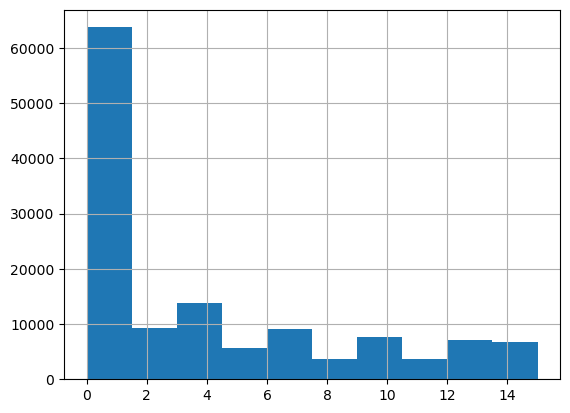

In [51]:
# Generate histogram of track popularity for the mean popularity 
df_clean_popularity_mean['track_popularity'].hist()

As we can see on the histogram, the popularity of the vast majority of the entries fall below 2. Therefore, we're going to reduce the dataset further to only include tracks that have a popularity less than 2: 

In [52]:
# Create a new dataset with the track of popularity 2 or less 
df_clean_non_popular_tracks = (df_clean.query('track_popularity <= 2'))

In [53]:
# Get reduction percentage of newly reduced dataframe
print("Total entries (after reduction):", len(df_clean_non_popular_tracks))
print("Size reduction:", 1 - len(df_clean_non_popular_tracks) / len(df_clean))

Total entries (after reduction): 72973
Size reduction: 0.6514539271316941


As shown above, after further subsetting the data, we were able to reduce it by 65% of the size of the clean dataset. With a total of 72973, we still believe the data might too large considering the limited resources. Therefore, we're going to use a sample that represents 10% of the already reduced datase:



In [54]:
# Get a sample that contains 10% of the non popular dataset 
df_clean_reduced = df_clean_non_popular_tracks.sample(frac=0.10)

We're now going to add the target variable "hit" to the non popular tracks dataframe and to the popular (equal or greater than 87) dataframes: 

In [55]:
# Set target variable on the reduced clean dataset (10% sample)
df_clean_reduced['hit'] = 'no'

In [56]:
# Set target variable on the "hits" (most popular tracks)
spotify_popularity_gt_87['hit'] = 'yes'

Now, we are ready to concatenate the two datasets: 

In [57]:
# Concatenate least popular with most popular tracjs 
df_clean_final = pd.concat([df_clean_reduced, spotify_popularity_gt_87])

Finally, we're going to drop the "track_popularity" column since this is represented by the "hit" (target) column:

In [58]:
# Drop tje "track_popularity" columns
df_clean_final = df_clean_final.drop('track_popularity', axis=1)

In [59]:
# Explore resulting concatenated dataframe
df_clean_final

,duration_sec,genre_0,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,explicit,release_month,hit
184236,50.748,cantautora mexicana,0.39700,0.722,0.305,0.000000,6.0,0.1620,-12.851,1.0,0.9090,114.639,3.0,0.81300,False,November,no
40994,178.582,workout product,0.03560,0.680,0.660,0.000009,2.0,0.0745,-6.996,0.0,0.0465,127.981,4.0,0.77400,False,April,no
171755,120.000,yoga,0.33100,0.206,0.887,0.980000,1.0,0.4150,-24.234,0.0,0.0643,107.007,3.0,0.00622,False,February,no
233778,161.982,lullaby,0.94600,0.932,0.079,0.622000,7.0,0.0709,-20.000,0.0,0.2070,112.027,4.0,0.69800,False,November,no
267073,80.585,vbs,0.87900,0.591,0.219,0.000000,8.0,0.2470,-14.441,1.0,0.0404,99.877,4.0,0.70800,False,March,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371209,224.000,barbadian pop,0.07170,0.509,0.637,0.000011,4.0,0.0789,-4.830,0.0,0.0471,172.006,3.0,0.37800,True,January,yes
371873,297.786,detroit hip hop,0.06220,0.548,0.847,0.000000,1.0,0.0816,-3.237,1.0,0.1860,171.447,4.0,0.10000,True,May,yes
371942,350.320,detroit hip hop,0.02150,0.802,0.755,0.000000,4.0,0.2950,-3.138,0.0,0.0564,130.027,4.0,0.58000,True,May,yes
372880,229.146,chicago rap,0.14500,0.367,0.665,0.000000,1.0,0.1130,-2.821,1.0,0.0465,148.913,4.0,0.31000,True,June,yes


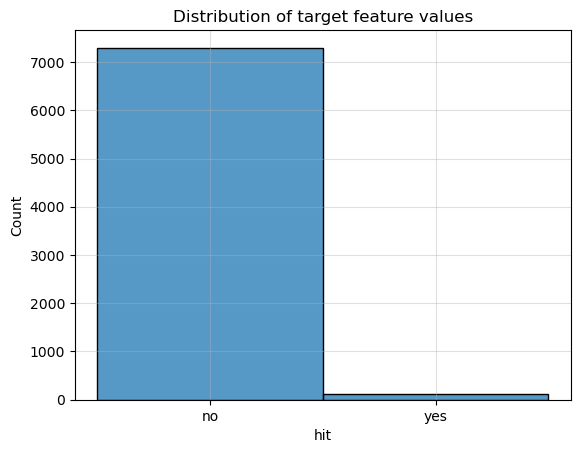

In [60]:
# Visualize distribution of target feature values using the Seaborn library
sns.histplot(df_clean_final['hit']).set_title('Distribution of target feature values')

# Display grid and reduce alpha (increase transparency)
plt.grid(alpha=0.4)

Next, we proceed to the data encoding and normalization via a column transformer:

In [62]:
# Create list of categorical columns
categorical_columns = df_clean_final.drop('hit', axis=1).select_dtypes(include=['object']).columns.tolist()
# Verify
categorical_columns

['genre_0', 'explicit', 'release_month']

In [63]:
# Instantate column transformer to encode and scale the data subset  
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), categorical_columns),
                                     remainder = StandardScaler())


In [64]:
# Set X dataframe
X = transformer.fit_transform(df_clean_final.drop(['hit'], axis=1))

In [65]:
# Set "y" (target) series
y = df_clean_final['hit']

### Train / Test Split

In [66]:
# Package imports
from sklearn.model_selection import train_test_split

Using the train_test_split model selector, we proceed to create the train and test data. By default, this model splits the data with train_size ratio of **0.25** and shuffles the data **(shuffle=True)**. We set the **random_state=44** to control the randomness of the data and thus generate reproductible oututs:

In [67]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=44)

# Data Modeling 

In [68]:
# Imports
from time import perf_counter_ns
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

To make the modeling process more efficient, we definr a function named "train_model" that will help us run several modeling iterations using different models and variations, as well as obtaining model performance metrics:   

In [69]:
# Define a function that trains the model and provide performance results
def train_model(model, X_train, y_train, X_test, y_test, display_confusion_matrix = True):
    #Sets timer 
    start_time = perf_counter_ns()
    # Fit model
    model.fit(X_train, y_train)
    # Ends timer
    end_time = perf_counter_ns()
    # Calculates fit process duration
    duration = end_time - start_time
    
    # Generate predictions
    prediction_test = model.predict(X_test)
    
    # Calculate score for train and test data
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Calculates precison and recall
    precision = precision_score(y_test, prediction_test, pos_label='no')
    recall = recall_score(y_test, prediction_test, pos_label='no')
    
    # Display confusion matrix (if required. Dafaults to "True") 
    if(display_confusion_matrix):
        ConfusionMatrixDisplay.from_predictions(y_test, prediction_test)
    
    # Return dictionary with model and results
    return {
        'model' : model, 
        'fit_duration' : duration,
        'train_score' : train_score,
        'test_score' : test_score,
        'precision' : precision,
        'recall' : recall
    }

## Baseline model

In [71]:
from sklearn.dummy import DummyClassifier

To create a baseline clasifier, we're going to leverage the DummyClassifier class. As stated by the Sklearn documentation "This classifier serves as a simple baseline to compare against other more complex classifiers".

{'model': DummyClassifier(random_state=42, strategy='stratified'),
 'fit_duration': 2803282,
 'train_score': 0.9710118833273317,
 'test_score': 0.9703023758099352,
 'precision': 0.9873556899395272,
 'recall': 0.9824945295404814}

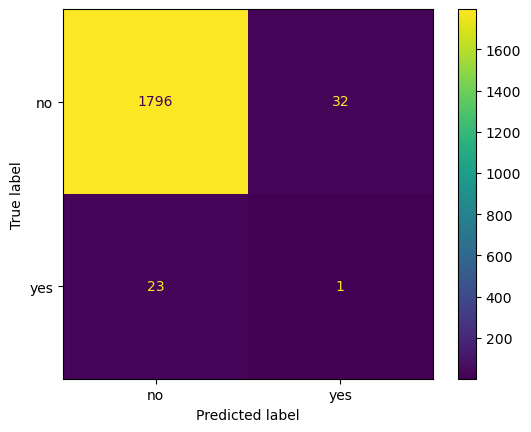

In [72]:
# Create a baseline classifier using the DummyClassifier  
dummy_clf = train_model(DummyClassifier(strategy='stratified', random_state=42), X_train, y_train, X_test, y_test)

# Output dummy classifier
dummy_clf

## Basic Model: Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

Next, we will use logistic regression to build a basic model. We're going to use the default settings of the LogisticRegression model, except we'll set the **max_iter=1000** parameter to adjust the minimum number of iterations for the data to converge:

{'model': LogisticRegression(max_iter=1000),
 'fit_duration': 45308897,
 'train_score': 0.9906373784659704,
 'test_score': 0.990280777537797,
 'precision': 0.991313789359392,
 'recall': 0.9989059080962801}

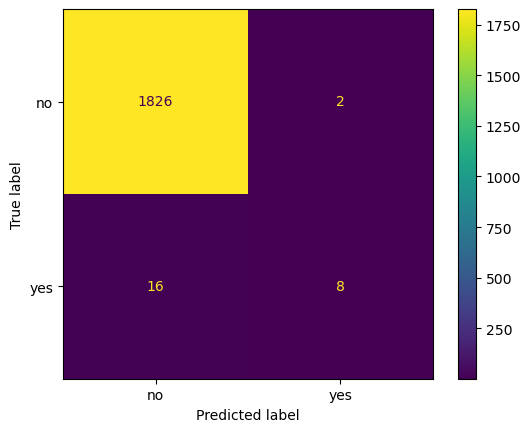

In [74]:
# Train LogisticRegression model by leveraging the train_model custom function 
lrg = train_model(LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test)

# Display model output
lrg

In [75]:
# Print the accuracy of the model on the Train data
print("Accuracy on Train Data ", lrg['train_score'])
# Print the accuracy of the model on the Test data
print("Accuracy on Test Data ", lrg['test_score'])

Accuracy on Train Data  0.9906373784659704
Accuracy on Test Data  0.990280777537797


Notice that this model got a perfect accuracy score. The confusion matrix helps us visualize that the model was only able to predict some only 2 true positives (TP) and just 2 false negatives (FN). 

## Model Comparison

In [77]:
# Package imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Next, we're going to train other data classication models, namely KNN, Decision Tree and SVM, and compare their results to the ones obtained thus far.    

### KNN

{'model': KNeighborsClassifier(),
 'fit_duration': 5072733,
 'train_score': 0.9870363701836514,
 'test_score': 0.9886609071274298,
 'precision': 0.9886425094645754,
 'recall': 1.0}

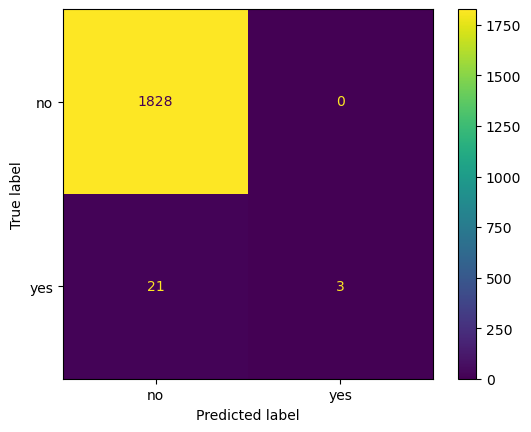

In [78]:
# Instantiate and train KNN model by leveraging the train_model custom function  
knn = train_model(KNeighborsClassifier(), X_train, y_train, X_test, y_test)

# Display model output
knn

### DecisionTree

{'model': DecisionTreeClassifier(),
 'fit_duration': 214522908,
 'train_score': 1.0,
 'test_score': 0.9929805615550756,
 'precision': 0.9967159277504105,
 'recall': 0.9961706783369803}

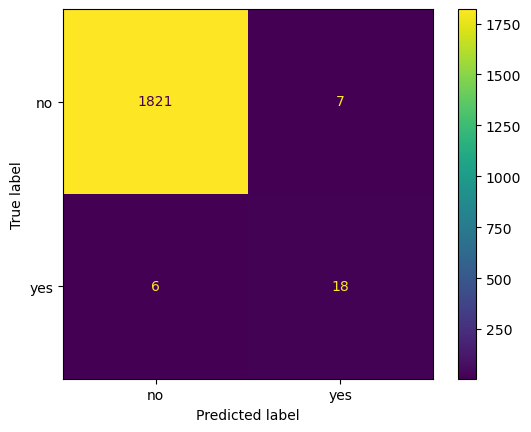

In [79]:
# Instantiate and train KNN model by leveraging the train_model custom function  
dtree = train_model(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

# Display model output
dtree

In [80]:
dtree['model'].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### SVM

{'model': SVC(),
 'fit_duration': 142160992,
 'train_score': 0.9881166726683471,
 'test_score': 0.9886609071274298,
 'precision': 0.9886425094645754,
 'recall': 1.0}

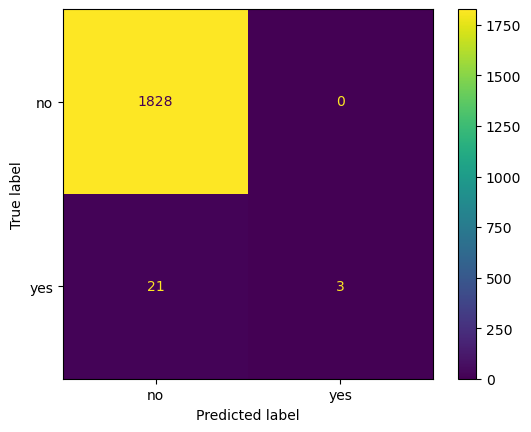

In [81]:
# Instantiate and train KNN model by leveraging the train_model custom function  
svm = train_model(SVC(), X_train, y_train, X_test, y_test)

# Display model output
svm

## Preliminary Results

In [82]:
# Create results array 
results = [
    ['DummyClassifier', dummy_clf['fit_duration'], dummy_clf['train_score'], dummy_clf['test_score'], dummy_clf['precision'], dummy_clf['recall']],
    ['LogisticRegression', lrg['fit_duration'], lrg['train_score'], lrg['test_score'], lrg['precision'], lrg['recall']],
    ['KNN', knn['fit_duration'], knn['train_score'], knn['test_score'], knn['precision'], knn['recall']],
    ['DecisionTree', dtree['fit_duration'], dtree['train_score'], dtree['test_score'], dtree['precision'], dtree['recall']],
    ['SVM', svm['fit_duration'], svm['train_score'], svm['test_score'], svm['precision'], svm['recall']],
]

In [83]:
# Create Pandas dataframe to summary the resuuls obtained during the modeling process  
results_df = pd.DataFrame(results, columns=['Model', 'Train Time (ns)', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall'])

In [84]:
# Output results 
results_df

,Model,Train Time (ns),Train Accuracy,Test Accuracy,Precision,Recall
0,DummyClassifier,2803282,0.971012,0.970302,0.987356,0.982495
1,LogisticRegression,45308897,0.990637,0.990281,0.991314,0.998906
2,KNN,5072733,0.987036,0.988661,0.988643,1.000000
3,DecisionTree,214522908,1.000000,0.992981,0.996716,0.996171
4,SVM,142160992,0.988117,0.988661,0.988643,1.000000


<h4>Observations:</h4>
<ul>
    <li>
        As per training time, the best performing model was the KNN (aside from the Dummy Classifier), followed by the logistic regression model.
    </li>
    <li>
        As it relates to test accuracy and precision, the best results were produced by the Decision Tree classifier, followed by the Logistic Regression model. 
    </li>
    <li>
        In regards to recall, KNN and SVM obtained a perfect score of 1. However, this might be an indication of overfitting. Therefore, we may consider more proper recall scores by the Logistic regression model followed by the Decision Tree classifier. 
    </li>
</ul>

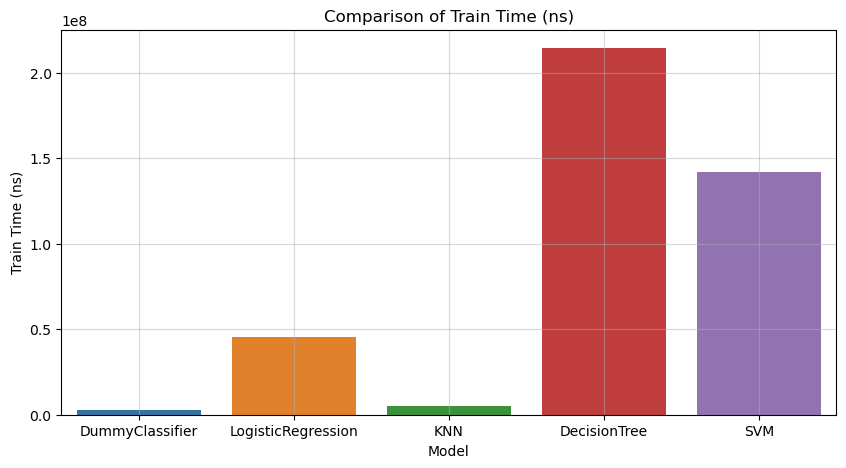

In [85]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_df, x='Model', y='Train Time (ns)').set_title('Comparison of Train Time (ns)')
# Display grid and set transparency
plt.grid(alpha=0.5)

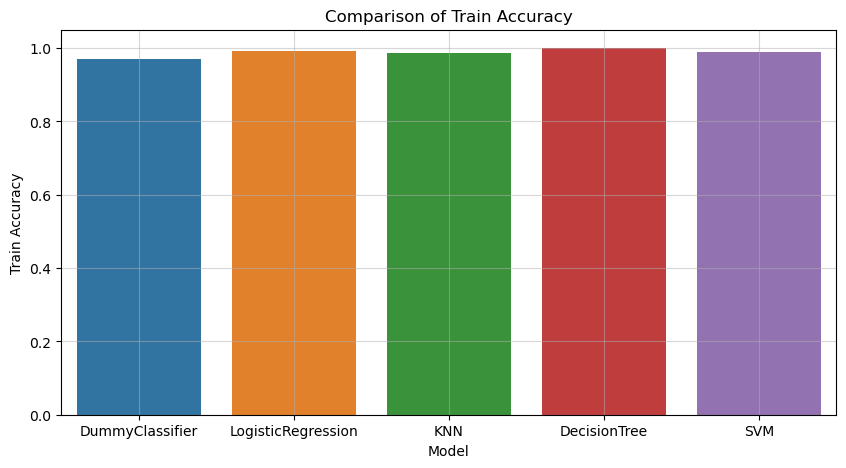

In [88]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_df, x='Model', y='Train Accuracy').set_title('Comparison of Train Accuracy')
# Display grid and set transparency
plt.grid(alpha=0.5)

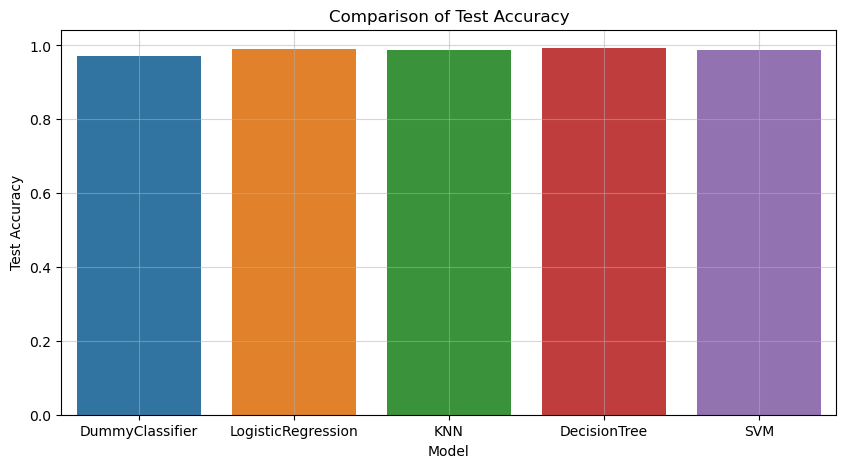

In [89]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_df, x='Model', y='Test Accuracy').set_title('Comparison of Test Accuracy')
# Display grid and set transparency
plt.grid(alpha=0.5)

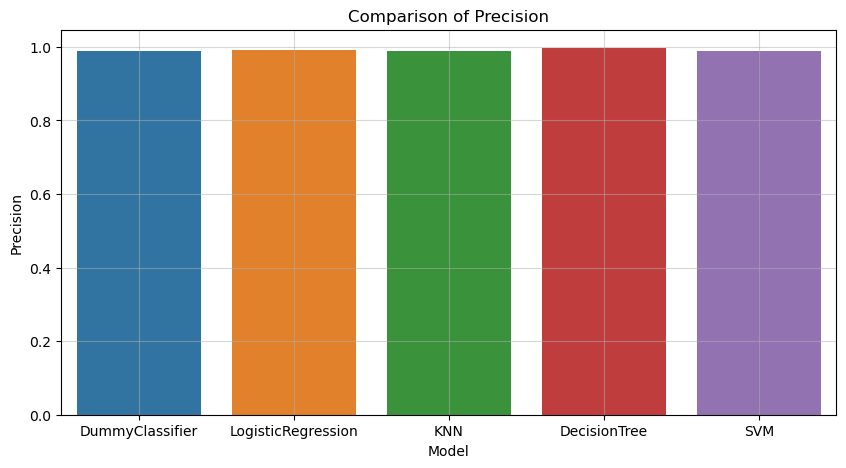

In [90]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_df, x='Model', y='Precision').set_title('Comparison of Precision')
# Display grid and set transparency
plt.grid(alpha=0.5)

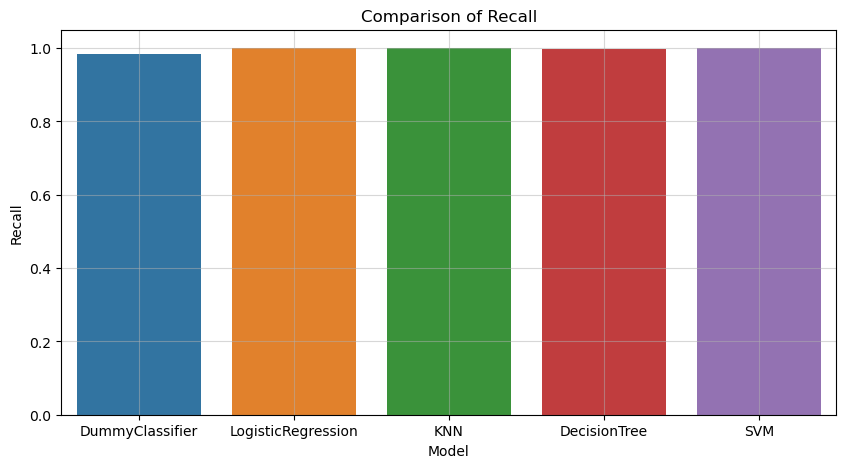

In [91]:
# Instantiate mathplot figure and set size 
plt.figure(figsize=(10,5))
# Generate bar plot using Seaborn
sns.barplot(data=results_df, x='Model', y='Recall').set_title('Comparison of Recall')
# Display grid and set transparency
plt.grid(alpha=0.5)

## Determining the most important features

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance

In [121]:
# Crate train/split data
X_train, X_test, y_train, y_test = train_test_split(df_clean_final.drop('hit', axis=1),df_clean_final['hit'], random_state=44)

In [110]:
# Instantiate feature selector
extractor = SelectFromModel(lgr_model)

Now, we instantiate the feature selector by passing the newly created logistc regresion model:

In [111]:
# Train LogisticRegression pipe by leveraging the "train_pipe" custom function
lgr_pipe = Pipeline([
        ('transformer', transformer),
        ('selector', extractor),
        ('lgr', LogisticRegression())        
    ])

# Genarate model output
lgr_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['genre_0', 'explicit',
                                                   'release_month'])])),
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(max_iter=1000,
                                                              penalty='l1',
                                                              random_state=42,
                                                              solver='liblinear'))),
                ('lgr', LogisticRegression())])

In [112]:
# Get feature names
feature_names = lgr_pipe.named_steps['transformer'].get_feature_names_out() 

# Instantiate variable with the selected features
selected_features =feature_names[ [int(i[1:]) for i in lgr_pipe.named_steps['selector'].get_feature_names_out()]]

# Remove the "__" word separators added by the selector 
clean_names = [i.split('__')[-1] for i in selected_features]

# Create a dataframe with the coefficients
coef_df = pd.DataFrame({
    'feature' : clean_names,
    'coefs' : abs(lgr_pipe.named_steps['lgr'].coef_[0])
})

# Sort the order of the dataframe by the coeficient values in descending order
coef_df = coef_df.sort_values(by ='coefs', ascending = False)

# Get the latest 5 rows of the dataframe
coef_df.head(20)

,feature,coefs
13,genre_0_pop,4.359166
0,genre_0_adult standards,2.583933
15,genre_0_reggaeton,2.291449
2,genre_0_alternative rock,2.281334
10,genre_0_hip hop,2.073017
1,genre_0_alternative metal,2.065240
6,genre_0_canadian hip hop,1.947846
11,genre_0_karaoke,1.808232
31,loudness,1.798919
28,instrumentalness,1.787945


Text(0.5, 0, 'Feature')

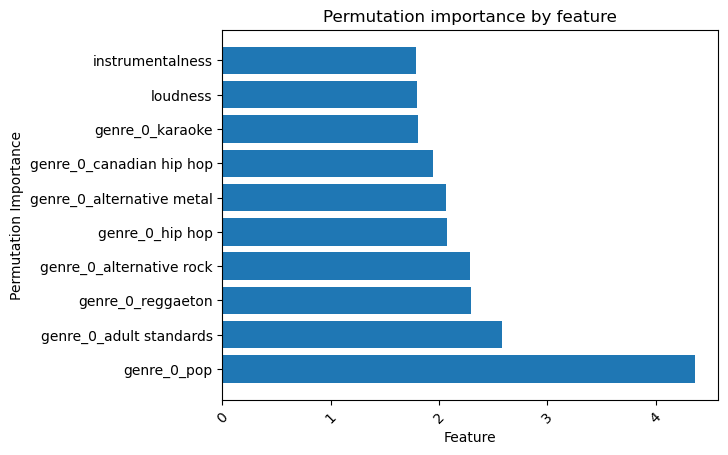

In [113]:
# Genarate horizontal barchart to visualize results
plt.barh(y=coef_df['feature'].head(10), width=coef_df['coefs'].head(10))
plt.xticks(rotation=45)
plt.title("Permutation importance by feature")
plt.ylabel("Permutation Importance")
plt.xlabel("Feature")

It is clear from the visualization that "genre" seems to be the most determining factor for a song to be a hit. 

## Model Optimization

In [127]:
# Package imports
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Based on the preliminary results, both the DecisionTree and LogisticRegression seem like the best candidates for further optimization.

To help us optimize our basic models, we will make use of **PipeLines** and **GridsSearchCV**. Also, to help make the process more efficient, we will define a custom function named "train_pipe" that will help us instantiate and train a pipe and get performance metrics. This function also provides a ROC visualization in addition to the confusion matrix: 

In [128]:
# Define a function that trains a pipeline and provide performance results
def train_pipe(pipe, X_train, y_train, X_test, y_test, display_visualizations = True):
    #Start timer
    start_time = perf_counter_ns()
    # Train pipe
    pipe.fit(X_train, y_train)
    #End timer
    end_time = perf_counter_ns()
    # Calculate 
    duration = end_time - start_time
    
    # Generate predictions
    prediction_test = pipe.predict(X_test)
    
    # Calculate train and test scores (accuracy)
    train_score = pipe.score(X_train, y_train)
    test_score = pipe.score(X_test, y_test)

    # Calculate precision and recall scores
    precision = precision_score(y_test, prediction_test, pos_label='no')
    recall = recall_score(y_test, prediction_test, pos_label='no')
    
    # Determine if visualizations need to be displayed
    if(display_visualizations):
        fig, ax = plt.subplots(1, 2, figsize = (20, 6))
        ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, ax = ax[0])
        RocCurveDisplay.from_estimator(pipe, X_test, y_test, ax = ax[1])
        ax[1].plot(np.array([0, 1]), np.array([0, 1]))    
    
    # Return pipe dictionary
    return {
        'pipe' : pipe, 
        'fit_duration' : duration,
        'train_score' : train_score,
        'test_score' : test_score,
        'precision' : precision,
        'recall' : recall
    }

In [129]:
# Define a function that trains a pipeline and provide performance results
def train_grid(pipe, param_grid, X_train, y_train, X_test, y_test, scoring = 'roc_auc', display_visualizations = True):
    
    # Instantiate grid
    grid = GridSearchCV(pipe, param_grid=param_grid, scoring = scoring)
    
    # start timer
    start_time = perf_counter_ns()
    # train grid
    grid.fit(X_train, y_train)
    #stop timer
    end_time = perf_counter_ns()
    # calculate duration of fit process
    duration = end_time - start_time
    
    # generate predictions
    prediction_test = grid.predict(X_test)
    
    # calculate accuracy
    train_score = grid.score(X_train, y_train)
    test_score = grid.score(X_test, y_test)

    # calculate precision and recall
    precision = precision_score(y_test, prediction_test, pos_label='no')
    recall = recall_score(y_test, prediction_test, pos_label='no')
    
    # If needed, display visualizations
    if(display_visualizations):
        fig, ax = plt.subplots(1, 2, figsize = (20, 6))
        ConfusionMatrixDisplay.from_estimator(grid.best_estimator_, X_test, y_test, ax = ax[0])
        RocCurveDisplay.from_estimator(grid.best_estimator_, X_test, y_test, ax = ax[1])
        ax[1].plot(np.array([0, 1]), np.array([0, 1]))    
    
    # return grid results
    return {
        'grid' : grid, 
        'fit_duration' : duration,
        'train_score' : train_score,
        'test_score' : test_score,
        'precision' : precision,
        'recall' : recall
    }

<h3> Optimize LogisticRegression Model</h3>

<p>We'll continue with the optimization of the LogisticRegression model. For this, we'll set the penalty mode to "l1" so that the model uses Lasso regularization. The reason for this is that Lasso minimizes the coefficients of the less important features to zero, which is ideal for feature selection. We'll also set the solver parameter to "liblinear" since it is the recommended solver for small datasets:</p>



In [130]:
# Crate train/split data
X_train, X_test, y_train, y_test = train_test_split(df_clean_final.select_dtypes(exclude=['object']),df_clean_final['hit'], random_state=44)

In [131]:
# Instantiate LogisticRegression model with non-default parameters
lgr_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter = 1000)

# Genaret model output
lgr_model

LogisticRegression(max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

Next, we proceed with the training of the model by using the custom function **train_pipe**:

{'pipe': Pipeline(steps=[('selector',
                  SelectFromModel(estimator=LogisticRegression(max_iter=1000,
                                                               penalty='l1',
                                                               random_state=42,
                                                               solver='liblinear'))),
                 ('lgr',
                  LogisticRegression(max_iter=1000, penalty='l1',
                                     random_state=42, solver='liblinear'))]),
 'fit_duration': 95367020,
 'train_score': 0.9846957148001441,
 'test_score': 0.9870410367170627,
 'precision': 0.9870410367170627,
 'recall': 1.0}

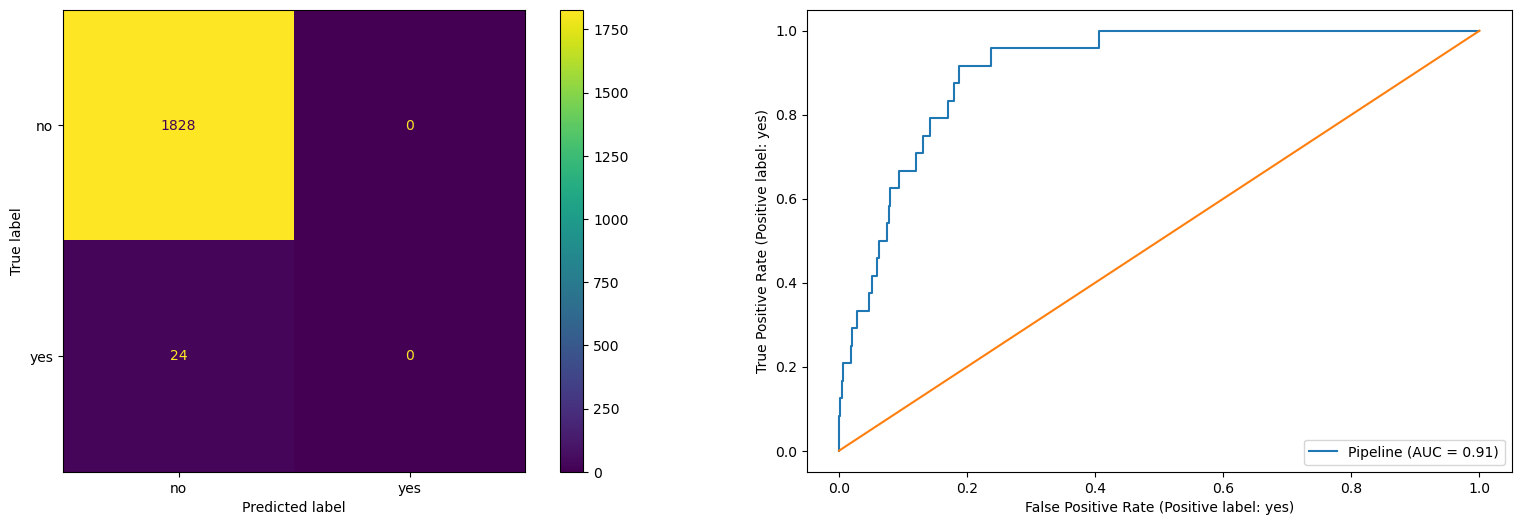

In [132]:
# Train LogisticRegression pipe by leveraging the "train_pipe" custom function
lgr_pipe = train_pipe(
    Pipeline([
        ('selector', extractor),
        ('lgr', lgr_model)        
    ]), X_train, y_train, X_test, y_test)

# Genarate model output
lgr_pipe

<h3> Optimize the DecisionTree Model</h3>


Next, we're going to proceed to find the optimal parameters for the DecisionTree classifier. In this case, we're passing an array of values so that the grid can determine the optimal parameters for <i>min_impurity_decrease</i> (which controls if a node should be splitted based on the amount of impurity that will result from such split), <i>max_depth</i> (the maximum depth of a tree) and <i>min_split</i>(which controls the minimum number of samples required to split an internal node).

{'grid': GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
              param_grid={'max_depth': [2, 5, 10, 15],
                          'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
                          'min_samples_split': [0.1, 0.2, 0.05]},
              scoring='roc_auc'),
 'fit_duration': 3240442405,
 'train_score': 0.5,
 'test_score': 0.5,
 'precision': 0.9870410367170627,
 'recall': 1.0}

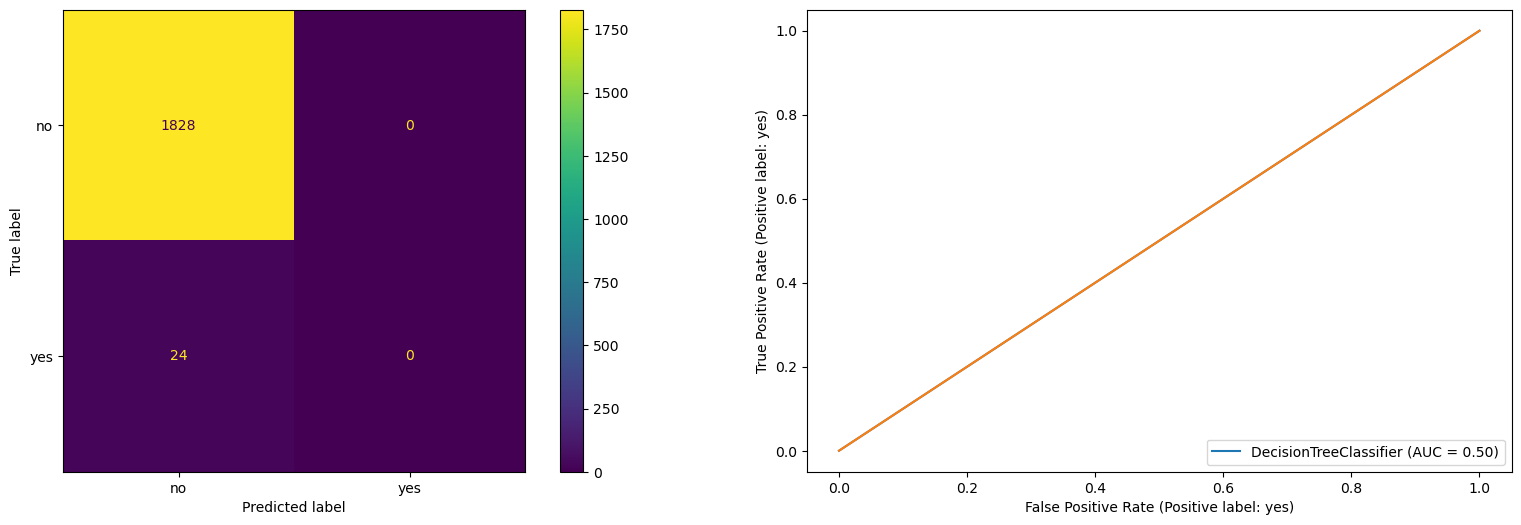

In [133]:
# Instanttiate and train the DecisionTree classier using the custom function:
dtree_grid = train_grid(
    DecisionTreeClassifier(random_state=42), 
    {
        'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
        'max_depth': [2, 5, 10, 15],
        'min_samples_split': [0.1, 0.2, 0.05]
    },
    X_train, 
    y_train,
    X_test, 
    y_test,
    scoring = 'roc_auc'
)

# Display outut from model
dtree_grid

### Observations:
From the data obtained, we can observe that the model optimization phase did not provide better results than the basic (default) models. Therefore, further hyperparameter tuning may be necessary. 


# Next Steps

At this stage of the project we have produced a clean dataset that contains what we believe to be the most relevant features to create a model that can predict with high accuracy if a song has the potential to be a hit. 

As it was found, the most determining factor seems to be the song genre, from which the "pop" genre seems to be the strongest genre among hit songs. However, this dataset provides a rich amount of information about track characteristics, including tempo, key, mode, energy, etc., that we believe are worth exploring aside from song genre. Therefore, as a next step, we'll perform another iteration where the song genre is ignored to see if we can obtain valuable information about the characteristics of hit songs.

Additionally, we will look into validating our model with information obtained from the Billboard music charts since these charts are considered standards in the music industry. 

# WORK IN PROGRESS...
<b>PLEASE IGNORE THIS SECTION</b>


In [ ]:
# Include visualizations about these 100 tracks
spotify_popularity_gt_87['genre_0'].value_counts()

In [ ]:
spotify_top1000.insert(17, 'track_name_lowercase', (spotify_top1000['track_name']).apply(lambda x: x.lower()))

In [ ]:
def search_spotify_db(df, track_name, artist_name):
    query = 'track_name == "' + track_name.lower() + '" and artist_0=="'+ artist_name +'"' 
    return df.query(query)[['track_name', 'track_popularity']]

def search_spotify_db_by_track_name(df, track_name):
    query = 'track_name == "' + track_name + '"' 
    return df.query(query)[['track_name', 'artist_0', 'track_popularity']]

def search_spotify_db_by_artist_name(df, artist_name):
    query = 'artist_0 == "' + artist_name + '"' 
    return df.query(query)[['track_name', 'artist_0', 'track_popularity']]

## Assembling the Billboard Top 40 Dataframe

Although it may seem like looping through the list is a more efficient approach, while attempting it it was determined that the inconsistencies on the metadata make the process less reliable. Therefore, the following section is a manual iteration to build the list 

In [ ]:
# List of tupplets containing thesong name and artist name
billboard_hot100_top40 = [
    ("Lovin On Me", 'Jack Harlow'),
    ("Lose Control", "Teddy Swims"),
    ("Beautiful Things", "Benson Boone"),
    ("Cruel Summer", "Taylor Swift"),
    ("Snooze", "SZA"),
    ("I Remember Everything", "Zack Bryan"),
    ("Greedy", "Tate McRae"),
    ("Fast Car", "Luke Combs"),
    ("Agora Hills", "Doja Cat"),
    ("Flowers", "Miley Cyrus"),
    ("Stick Season", "Noah Kahan"),
    ("Water", "Tyla"),
    ("Hiss", "Megan Thee Stallion"),    
    ("Redrum", "21 Savage"),
    ("Last Night", "Morgan Wallen"),
    ("Thinkin' Bout Me", "Morgan Wallen"),
    ("Paint The Town Red", "Doja Cat"),    
    ("Is It Over Now?", "Taylor Swift"),
    ("Never Lose Me", "Flo Milli"),    
    ("What Was I Made For", "Billie Ellish"),
    ("Yes, And?", "Ariana Grande"),
    ("Houdini", "Dua Lipa"),
    ("Selfish", "Justin Timberlake"),    
    ("Pretty Little Poison", "Warren Zeiders"),
    ("La Diabla", "Xavi"),    
    ("Where The Wild Things Are", "Luke Combs"),        
    ("Everybody", "Nicki Minaj"),
    ("Made For Me", "Muni Long"),
    ("Vampire", "Olivia Rodrigo"),
    ("The Painter", "Cody Johnson"),
    ("White Horse", "Chris Stapleton"),    
    ("Rich Baby Daddy", "Drake"),
    ("On My Mama", "Victoria Monet"),    
    ("Exes", "Tate McRae"),
    ("Wild Ones", "Jessie Murph"),    
    ("Feather", "Sabrina Carpenter"),
    ("Dance The Night", "Dua Lipa"),    
    ("Bandit", "Don Toliver"),
    ("Need A Favor", "Jelly Roll"),    
    ("Save Me", "Jelly Roll")        
]


In [ ]:
results = []
for hit in billboard_hot100_top40:
    results.append(search_spotify_db(df_sorted_by_popularity, hit[0], hit[1]))

In [ ]:
results

In [ ]:
track_names = []
for track_artist in billboard_hot100_top40:
    track_names.append(track_artist[0])

In [ ]:
track_names

In [ ]:
found_tracks = df_sorted_by_popularity.query('track_name in @track_names')[['track_name', 'artist_0', 'track_popularity']]

In [ ]:
found_tracks['track_name'].value_counts()

In [ ]:
track_names_not_found = []
for track_name in track_names:
    if(track_name not in found_tracks['track_name'].value_counts().index):
        track_names_not_found.append(track_name)

track_names_not_found

### Manual search of tracks not found

In [ ]:
manual_search_ids = []

#### Position #1: "Lovin on me" by Jack Harlow

In [ ]:
# Search by song name
search_spotify_db_by_track_name(df_sorted_by_popularity, billboard_hot100_top40[0][0])

In [ ]:
search_spotify_db_by_artist_name(df_sorted_by_popularity, billboard_hot100_top40[0][1])

Track not found

#### Position #9: "Agora Hills" by Doja Cat

In [ ]:
search_spotify_db_by_artist_name(df_sorted_by_popularity,billboard_hot100_top40[8][1])

Track not found

#### Position #11: "Stick Seaon" by Noah Kahan

In [ ]:
# Search by artist name
search_spotify_db_by_artist_name(df_sorted_by_popularity,billboard_hot100_top40[10][1])

Track not found

#### Position #13: "Hiss" by Megan Thee Stallion

In [ ]:
# Search by artist name
search_spotify_db_by_artist_name(df_sorted_by_popularity,billboard_hot100_top40[12][1]).sort_values(by='track_name').values

Track not found

#### Position #16: "Thinkin' Bout Me" by Morgan Wallen

In [ ]:
# Search by artist name
search_spotify_db_by_track_name(df_sorted_by_popularity,billboard_hot100_top40[14][1])
# billboard_hot100_top40[14][1]

In [ ]:
# Append id of entry found
manual_search_ids.append(345244)

In [ ]:
# List of tupplets containing thesong name and artist name
billboard_hot100_top40 = [
    ("Rockin' Around The Christmas Tree", 'Brenda Lee'),
    ("All I Want For Christmas Is You", "Mariah Carey"),
    ("Jingle Bell Rock", "Bobby Hemls"),
    ("Last Christmas", "Wham!"),
    ("Lovin on Me", "Jack Harlow"),
    ("A Holly Jolly Christmas", "Burl Ives"),
    ("Cruel Summer", "Taylor Swift"),  
    ("It's The Most Wonderful Time Of The Year", "Andy Williams"),
    ("Snooze", "SZA"),
    ("Paint The Town Red", "Doja Cat"),    
    ("Feliz Navidad", "Jose Feliciano"),
    ("Let It Snow, Let It Snow, Let It Snow!", "Dean Martin"),
    ("Underneath The Tree", "Kelly Klarkson"),
    ("Sleigh Ride", "The Ronettes"),
    ("The Christmas Song", "Nat King Cole"),    
    ("Greedy", "Tate McRae"),
    ("Santa Tell Me", "Ariana Grande"),
    ("White Christmas", "Bing Crosby"),    
    ("I Remember Everything", "Zach Bryan"),
    ("Water", "Tyla"),    
    ("Christmas", "Darlene Love"),
    ("Last Night", "Morgan Wallen"),    
    ("Deck The Walls", "Nat King Cole"),
    ("Blue Christmas", "Elvis Presley"),
    ("It's Beginning To Look A Lot Like Christmas", "Michael Bubble"),    
    ("Thinkin' Bout Me", "Morgan Wallen"),        
    ("You're Losing Me", "Taylor Swift"),
    ("Jingle Bells", "Frank Sinatra"),    
    ("Agora Hills", "Doja Cat"),
    ("Is It Over Now?", "Taylor Swift"),    
    ("Here Comes Santa Claus", "Gene Autry"),
    ("Fast Car", "Luke Combs"),
    ("Rudolph The Red-Nosed Reindeer", "Gene Autry"),
    ("Santa Claus is Comin' To Town", "Jackson 5"),
    ("Run Rudoplh Run", "Chuck Berry"),
    ("You're A Mean One, Mr. Grinch", "Thurl Ravenscroft"),    
    ("Fukumean", "Gunna"),
    ("Lil Boo Thang", "Paul Russell"),    
    ("Rich Baby Daddy", "Drake"),
    ("Need A Favor", "Jelly Roll"),
]